In [2]:
library(Seurat)

Warning message:
“package ‘Seurat’ was built under R version 4.2.3”
Attaching SeuratObject



In [1]:
scRNA = readRDS('./after_rename.rds')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [3]:
Idents(scRNA) = 'celltype'

myeloid = subset(scRNA, subset = celltype == c('Macrophages','Monocytes'))

Warning message in celltype == c("Macrophages", "Monocytes"):
“longer object length is not a multiple of shorter object length”


In [4]:
DefaultAssay(myeloid)  = 'RNA'
Idents(myeloid) = 'orig.ident'
object.markers <- FindMarkers(myeloid, ident.1 = 'MI3d',ident.2 = 'control',only.pos = T)

In [5]:
outdir=paste('./',"mac_out",sep="/")
if(!file.exists(outdir)){
   dir.create(outdir)
}


In [6]:
write.csv(object.markers,file = paste0(outdir,'/myeloid_diff_gene.csv'))

### MI14d vs MI3d

In [7]:
Idents(myeloid) = 'orig.ident'
object.markers <- FindMarkers(myeloid, ident.1 = 'MI3d',ident.2 = 'MI14d',only.pos = T)

In [8]:
write.csv(object.markers,file = paste0(outdir,'/myeloid_MI14dvsMI3d.csv'))

In [3]:
scRNA

An object of class Seurat 
27998 features across 57073 samples within 1 assay 
Active assay: RNA (27998 features, 2000 variable features)
 3 dimensional reductions calculated: pca, umap, tsne

In [5]:
library(Seurat)

Warning message:
“package ‘Seurat’ was built under R version 4.2.3”
Attaching SeuratObject



In [ ]:
Idents(scRNA) = 'celltype'

DefaultAssay(scRNA) ='RNA'

VlnPlot(scRNA,features = 'Fabp4',pt.size = 0.5)

In [11]:
Idents(scRNA) = 'orig.ident'

Warning message:
“Scaling data with a low number of groups may produce misleading results”


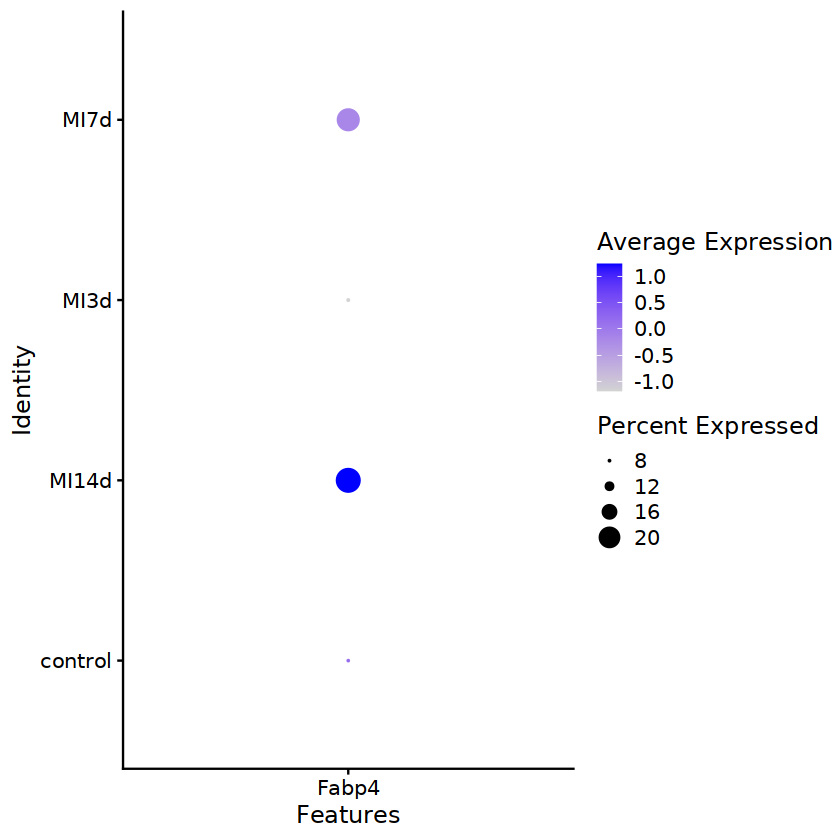

In [15]:
DotPlot(scRNA,features = 'Fabp4')

In [3]:
scRNA

An object of class Seurat 
27998 features across 57073 samples within 1 assay 
Active assay: RNA (27998 features, 2000 variable features)
 3 dimensional reductions calculated: pca, umap, tsne

In [4]:
scRNA$celltype = gsub('Monocytes','Myeloid',scRNA$celltype)

In [5]:
scRNA$celltype = gsub('Macrophages','Myeloid',scRNA$celltype)

In [8]:
Idents(scRNA) = 'orig.ident'

Saving 6.67 x 6.67 in image


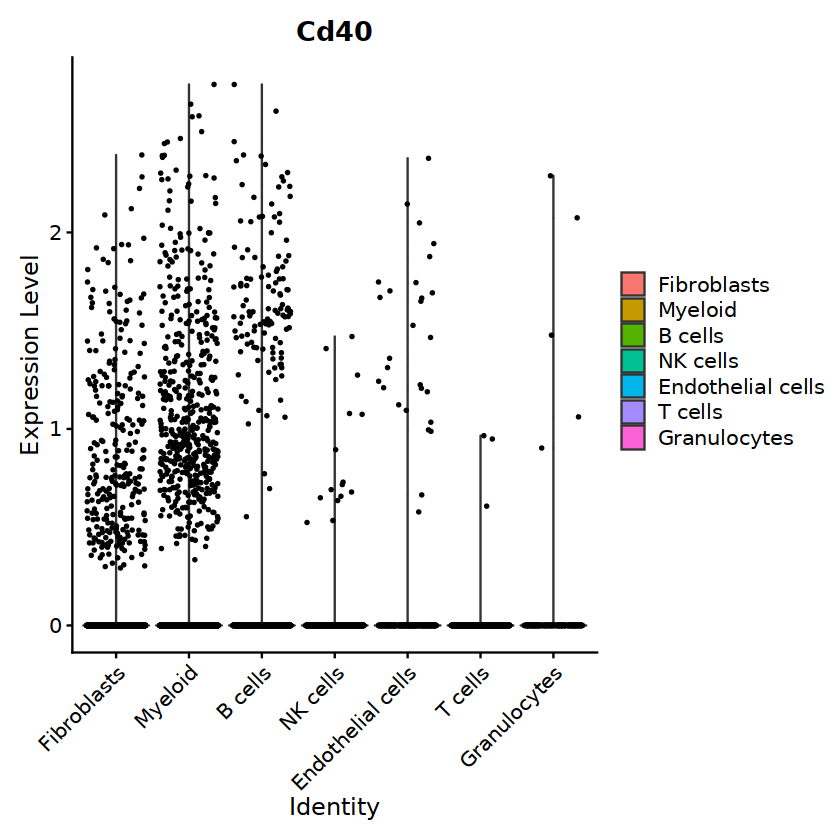

In [19]:
d7 = subset(scRNA,idents = 'MI7d')
Idents(d7) = 'celltype'
DefaultAssay(d7) ='RNA'
VlnPlot(d7,features = 'Cd40',pt.size = 0.5)
ggsave('./out/DAY7.pdf')

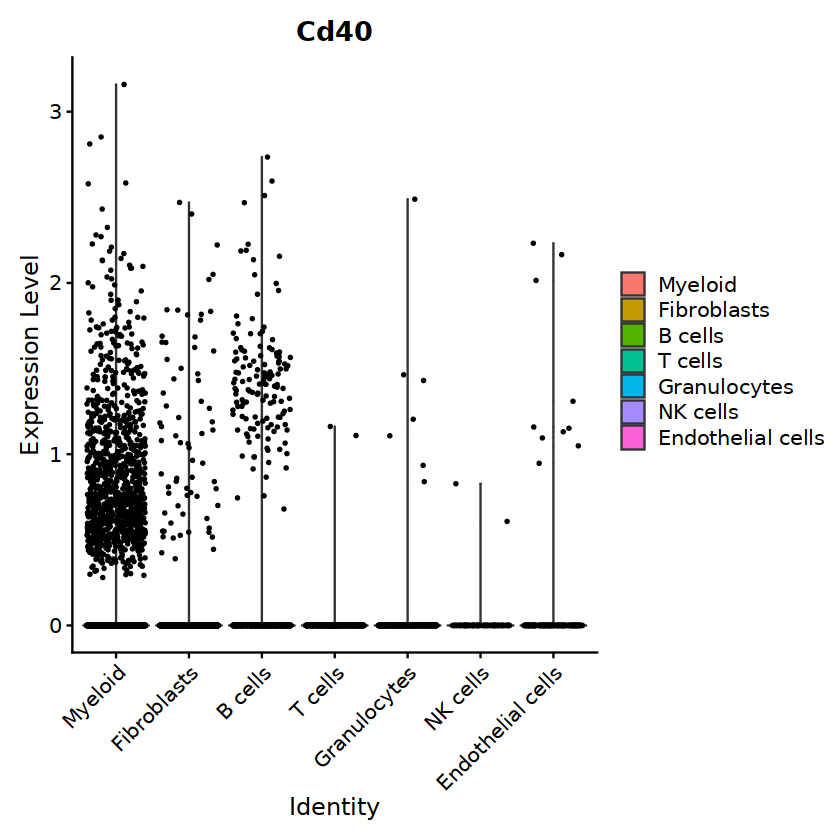

In [15]:
d3 = subset(scRNA,idents = 'MI3d')
Idents(d3) = 'celltype'
DefaultAssay(d3) ='RNA'
VlnPlot(d3,features = 'Cd40',pt.size = 0.5) 

In [17]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [18]:
ggsave('./out/DAY3.pdf')

Saving 6.67 x 6.67 in image
